In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
new_df = pd.get_dummies(data=df,columns=['sex','smoker','region'])

In [6]:
new_df

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [7]:
X = new_df.drop('charges',axis=1)
y = new_df['charges']

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=42)

In [10]:
tf.random.set_seed=42

model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(units=12,activation='relu'))
model.add(tf.keras.layers.Dense(units=12,activation='relu'))
model.add(tf.keras.layers.Dense(units=1))

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])


In [11]:
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13397.9170 - mae: 13397.9170
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13345.6162 - mae: 13345.6162
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 13345.2510 - mae: 13345.2510
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 13344.8691 - mae: 13344.8691
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 13344.4482 - mae: 13344.4482
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 13343.9482 - mae: 13343.9482
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 13343.2969 - mae: 13343.2969
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 13342.3496 - mae: 13342.3496
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 13340.8086 - mae: 13340.8086
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 13476.78

34/34 [==============================] - 0s 1ms/step - loss: 13319.1270 - mae: 13319.1270
Epoch 81/100
34/34 [==============================] - 0s 1ms/step - loss: 13318.7900 - mae: 13318.7900
Epoch 82/100
34/34 [==============================] - 0s 1ms/step - loss: 13318.4482 - mae: 13318.4482
Epoch 83/100
34/34 [==============================] - 0s 1ms/step - loss: 13318.1074 - mae: 13318.1074
Epoch 84/100
34/34 [==============================] - 0s 2ms/step - loss: 13317.7656 - mae: 13317.7656
Epoch 85/100
34/34 [==============================] - 0s 1ms/step - loss: 13317.4297 - mae: 13317.4297
Epoch 86/100
34/34 [==============================] - 0s 1ms/step - loss: 13317.0879 - mae: 13317.0879
Epoch 87/100
34/34 [==============================] - 0s 1ms/step - loss: 13316.7480 - mae: 13316.7480
Epoch 88/100
34/34 [==============================] - 0s 1ms/step - loss: 13316.4062 - mae: 13316.4062
Epoch 89/100
34/34 [==============================] - 0s 1ms/step - loss: 13316.0654 -

In [12]:
model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 997us/step - loss: 12934.3779 - mae: 12934.3779


[12934.3779296875, 12934.3779296875]

In [13]:
tf.random.set_seed=42

model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(units=12,activation='relu'))
model.add(tf.keras.layers.Dense(units=12,activation='relu'))
model.add(tf.keras.layers.Dense(units=1))

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['mae'])

model.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 13342.1494 - mae: 13342.1494
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13333.8389 - mae: 13333.8389
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 13322.5479 - mae: 13322.5479
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 13305.3799 - mae: 13305.3799
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 13280.6416 - mae: 13280.6416
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 13243.8799 - mae: 13243.8799
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 13189.4209 - mae: 13189.4209
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 13112.8418 - mae: 13112.8418
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 13010.6494 - mae: 13010.6494
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 12878.58

34/34 [==============================] - 0s 2ms/step - loss: 6814.5435 - mae: 6814.5435
Epoch 82/100
34/34 [==============================] - 0s 2ms/step - loss: 6800.6069 - mae: 6800.6069
Epoch 83/100
34/34 [==============================] - 0s 1ms/step - loss: 6785.9009 - mae: 6785.9009
Epoch 84/100
34/34 [==============================] - 0s 1ms/step - loss: 6769.7935 - mae: 6769.7935
Epoch 85/100
34/34 [==============================] - 0s 2ms/step - loss: 6753.6865 - mae: 6753.6865
Epoch 86/100
34/34 [==============================] - 0s 1ms/step - loss: 6738.9868 - mae: 6738.9868
Epoch 87/100
34/34 [==============================] - 0s 1ms/step - loss: 6725.1724 - mae: 6725.1724
Epoch 88/100
34/34 [==============================] - 0s 1ms/step - loss: 6709.4746 - mae: 6709.4746
Epoch 89/100
34/34 [==============================] - 0s 1ms/step - loss: 6694.8364 - mae: 6694.8364
Epoch 90/100
34/34 [==============================] - 0s 2ms/step - loss: 6681.1919 - mae: 6681.1919
Epo

In [14]:
model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 997us/step - loss: 6433.2773 - mae: 6433.2773


[6433.27734375, 6433.27734375]

In [15]:
tf.random.set_seed=42

model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(units=12,activation='relu'))
model.add(tf.keras.layers.Dense(units=12,activation='relu'))
model.add(tf.keras.layers.Dense(units=12,activation='relu'))
model.add(tf.keras.layers.Dense(units=1))

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['mae'])

model.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 13341.0059 - mae: 13341.0059
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13333.4463 - mae: 13333.4463
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 13318.3271 - mae: 13318.3271
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 13286.4619 - mae: 13286.4619
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 13221.3047 - mae: 13221.3047
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 13094.2051 - mae: 13094.2051
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 12865.9746 - mae: 12865.9746
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 12492.4629 - mae: 12492.4629
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 11925.0498 - mae: 11925.0498
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 11128.21

34/34 [==============================] - 0s 2ms/step - loss: 6700.7305 - mae: 6700.7305
Epoch 82/100
34/34 [==============================] - 0s 2ms/step - loss: 6681.2627 - mae: 6681.2627
Epoch 83/100
34/34 [==============================] - 0s 2ms/step - loss: 6662.6870 - mae: 6662.6870
Epoch 84/100
34/34 [==============================] - 0s 3ms/step - loss: 6644.0215 - mae: 6644.0215
Epoch 85/100
34/34 [==============================] - 0s 3ms/step - loss: 6624.4385 - mae: 6624.4385
Epoch 86/100
34/34 [==============================] - 0s 2ms/step - loss: 6606.3013 - mae: 6606.3013
Epoch 87/100
34/34 [==============================] - 0s 2ms/step - loss: 6588.7666 - mae: 6588.7666
Epoch 88/100
34/34 [==============================] - 0s 2ms/step - loss: 6569.9478 - mae: 6569.9478
Epoch 89/100
34/34 [==============================] - 0s 2ms/step - loss: 6554.3921 - mae: 6554.3921
Epoch 90/100
34/34 [==============================] - 0s 2ms/step - loss: 6536.6021 - mae: 6536.6021
Epo

In [16]:
model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 1ms/step - loss: 6273.5195 - mae: 6273.5195


[6273.51953125, 6273.51953125]

In [17]:
tf.random.set_seed=42

model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(units=12,activation='relu'))
model.add(tf.keras.layers.Dense(units=12,activation='relu'))
model.add(tf.keras.layers.Dense(units=12,activation='relu'))
model.add(tf.keras.layers.Dense(units=1))

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['mae'])

model.fit(X_train,y_train,epochs=400)

Epoch 1/400
34/34 [==============================] - 1s 2ms/step - loss: 13349.4590 - mae: 13349.4590
Epoch 2/400
34/34 [==============================] - 0s 2ms/step - loss: 13342.3887 - mae: 13342.3887
Epoch 3/400
34/34 [==============================] - 0s 2ms/step - loss: 13329.5195 - mae: 13329.5195
Epoch 4/400
34/34 [==============================] - 0s 2ms/step - loss: 13298.8555 - mae: 13298.8555
Epoch 5/400
34/34 [==============================] - 0s 2ms/step - loss: 13235.8027 - mae: 13235.8027
Epoch 6/400
34/34 [==============================] - 0s 2ms/step - loss: 13110.9023 - mae: 13110.9023
Epoch 7/400
34/34 [==============================] - 0s 2ms/step - loss: 12867.1523 - mae: 12867.1523
Epoch 8/400
34/34 [==============================] - 0s 2ms/step - loss: 12453.0752 - mae: 12453.0752
Epoch 9/400
34/34 [==============================] - 0s 2ms/step - loss: 11814.2334 - mae: 11814.2334
Epoch 10/400
34/34 [==============================] - 0s 2ms/step - loss: 10918.64

34/34 [==============================] - 0s 2ms/step - loss: 6624.7104 - mae: 6624.7104
Epoch 83/400
34/34 [==============================] - 0s 2ms/step - loss: 6608.7627 - mae: 6608.7627
Epoch 84/400
34/34 [==============================] - 0s 2ms/step - loss: 6595.9814 - mae: 6595.9814
Epoch 85/400
34/34 [==============================] - 0s 2ms/step - loss: 6581.8657 - mae: 6581.8657
Epoch 86/400
34/34 [==============================] - 0s 2ms/step - loss: 6569.8901 - mae: 6569.8901
Epoch 87/400
34/34 [==============================] - 0s 2ms/step - loss: 6557.5732 - mae: 6557.5732
Epoch 88/400
34/34 [==============================] - 0s 2ms/step - loss: 6546.7847 - mae: 6546.7847
Epoch 89/400
34/34 [==============================] - 0s 2ms/step - loss: 6533.7075 - mae: 6533.7075
Epoch 90/400
34/34 [==============================] - 0s 2ms/step - loss: 6520.8467 - mae: 6520.8467
Epoch 91/400
34/34 [==============================] - 0s 2ms/step - loss: 6509.2559 - mae: 6509.2559
Epo

34/34 [==============================] - 0s 2ms/step - loss: 5787.4087 - mae: 5787.4087
Epoch 163/400
34/34 [==============================] - 0s 2ms/step - loss: 5769.3887 - mae: 5769.3887
Epoch 164/400
34/34 [==============================] - 0s 2ms/step - loss: 5748.1851 - mae: 5748.1851
Epoch 165/400
34/34 [==============================] - 0s 2ms/step - loss: 5727.1167 - mae: 5727.1167
Epoch 166/400
34/34 [==============================] - 0s 2ms/step - loss: 5705.4731 - mae: 5705.4731
Epoch 167/400
34/34 [==============================] - 0s 2ms/step - loss: 5681.8452 - mae: 5681.8452
Epoch 168/400
34/34 [==============================] - 0s 2ms/step - loss: 5658.9009 - mae: 5658.9009
Epoch 169/400
34/34 [==============================] - 0s 2ms/step - loss: 5633.0830 - mae: 5633.0830
Epoch 170/400
34/34 [==============================] - 0s 2ms/step - loss: 5606.6250 - mae: 5606.6250
Epoch 171/400
34/34 [==============================] - 0s 2ms/step - loss: 5586.7300 - mae: 5586

34/34 [==============================] - 0s 2ms/step - loss: 3424.0164 - mae: 3424.0164
Epoch 243/400
34/34 [==============================] - 0s 2ms/step - loss: 3414.3127 - mae: 3414.3127
Epoch 244/400
34/34 [==============================] - 0s 2ms/step - loss: 3412.1177 - mae: 3412.1177
Epoch 245/400
34/34 [==============================] - 0s 2ms/step - loss: 3403.1572 - mae: 3403.1572
Epoch 246/400
34/34 [==============================] - 0s 2ms/step - loss: 3396.8210 - mae: 3396.8210
Epoch 247/400
34/34 [==============================] - 0s 2ms/step - loss: 3393.7214 - mae: 3393.7214
Epoch 248/400
34/34 [==============================] - 0s 2ms/step - loss: 3387.2554 - mae: 3387.2554
Epoch 249/400
34/34 [==============================] - 0s 2ms/step - loss: 3378.5239 - mae: 3378.5239
Epoch 250/400
34/34 [==============================] - 0s 2ms/step - loss: 3367.3486 - mae: 3367.3486
Epoch 251/400
34/34 [==============================] - 0s 2ms/step - loss: 3363.0769 - mae: 3363

34/34 [==============================] - 0s 2ms/step - loss: 2784.0938 - mae: 2784.0938
Epoch 323/400
34/34 [==============================] - 0s 2ms/step - loss: 2782.3767 - mae: 2782.3767
Epoch 324/400
34/34 [==============================] - 0s 2ms/step - loss: 2777.1199 - mae: 2777.1199
Epoch 325/400
34/34 [==============================] - 0s 2ms/step - loss: 2773.4673 - mae: 2773.4673
Epoch 326/400
34/34 [==============================] - 0s 2ms/step - loss: 2768.9080 - mae: 2768.9080
Epoch 327/400
34/34 [==============================] - 0s 2ms/step - loss: 2771.7546 - mae: 2771.7546
Epoch 328/400
34/34 [==============================] - 0s 2ms/step - loss: 2765.6323 - mae: 2765.6323
Epoch 329/400
34/34 [==============================] - 0s 2ms/step - loss: 2760.8518 - mae: 2760.8518
Epoch 330/400
34/34 [==============================] - 0s 2ms/step - loss: 2760.2161 - mae: 2760.2161
Epoch 331/400
34/34 [==============================] - 0s 2ms/step - loss: 2765.9207 - mae: 2765

In [18]:
tf.random.set_seed=42

model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(units=24,activation='relu'))
model.add(tf.keras.layers.Dense(units=24,activation='relu'))
model.add(tf.keras.layers.Dense(units=24,activation='relu'))
model.add(tf.keras.layers.Dense(units=1))

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['mae'])

model.fit(X_train,y_train,epochs=400)

Epoch 1/400
34/34 [==============================] - 0s 2ms/step - loss: 13342.2734 - mae: 13342.2734
Epoch 2/400
34/34 [==============================] - 0s 2ms/step - loss: 13326.9102 - mae: 13326.9102
Epoch 3/400
34/34 [==============================] - 0s 2ms/step - loss: 13278.1133 - mae: 13278.1133
Epoch 4/400
34/34 [==============================] - 0s 2ms/step - loss: 13120.0156 - mae: 13120.0156
Epoch 5/400
34/34 [==============================] - 0s 2ms/step - loss: 12707.6006 - mae: 12707.6006
Epoch 6/400
34/34 [==============================] - 0s 2ms/step - loss: 11800.9893 - mae: 11800.9893
Epoch 7/400
34/34 [==============================] - 0s 2ms/step - loss: 10241.0791 - mae: 10241.0791
Epoch 8/400
34/34 [==============================] - 0s 2ms/step - loss: 8448.3252 - mae: 8448.3252
Epoch 9/400
34/34 [==============================] - 0s 2ms/step - loss: 7532.3555 - mae: 7532.3555
Epoch 10/400
34/34 [==============================] - 0s 2ms/step - loss: 7440.2222 - 

34/34 [==============================] - 0s 2ms/step - loss: 5787.7866 - mae: 5787.7866
Epoch 83/400
34/34 [==============================] - 0s 2ms/step - loss: 5751.2886 - mae: 5751.2886
Epoch 84/400
34/34 [==============================] - 0s 2ms/step - loss: 5722.9961 - mae: 5722.9961
Epoch 85/400
34/34 [==============================] - 0s 2ms/step - loss: 5678.8765 - mae: 5678.8765
Epoch 86/400
34/34 [==============================] - 0s 2ms/step - loss: 5638.7881 - mae: 5638.7881
Epoch 87/400
34/34 [==============================] - 0s 2ms/step - loss: 5595.0273 - mae: 5595.0273
Epoch 88/400
34/34 [==============================] - 0s 2ms/step - loss: 5548.1465 - mae: 5548.1465
Epoch 89/400
34/34 [==============================] - 0s 3ms/step - loss: 5501.2837 - mae: 5501.2837
Epoch 90/400
34/34 [==============================] - 0s 2ms/step - loss: 5451.0459 - mae: 5451.0459
Epoch 91/400
34/34 [==============================] - 0s 2ms/step - loss: 5395.7617 - mae: 5395.7617
Epo

34/34 [==============================] - 0s 2ms/step - loss: 3432.9382 - mae: 3432.9382
Epoch 163/400
34/34 [==============================] - 0s 2ms/step - loss: 3426.8188 - mae: 3426.8188
Epoch 164/400
34/34 [==============================] - 0s 2ms/step - loss: 3418.7397 - mae: 3418.7397
Epoch 165/400
34/34 [==============================] - 0s 2ms/step - loss: 3416.7913 - mae: 3416.7913
Epoch 166/400
34/34 [==============================] - 0s 2ms/step - loss: 3429.0405 - mae: 3429.0405
Epoch 167/400
34/34 [==============================] - 0s 2ms/step - loss: 3406.5269 - mae: 3406.5269
Epoch 168/400
34/34 [==============================] - 0s 2ms/step - loss: 3400.6528 - mae: 3400.6528
Epoch 169/400
34/34 [==============================] - 0s 2ms/step - loss: 3392.6260 - mae: 3392.6260
Epoch 170/400
34/34 [==============================] - 0s 2ms/step - loss: 3390.4397 - mae: 3390.4397
Epoch 171/400
34/34 [==============================] - 0s 2ms/step - loss: 3385.9246 - mae: 3385

34/34 [==============================] - 0s 2ms/step - loss: 3024.9175 - mae: 3024.9175
Epoch 243/400
34/34 [==============================] - 0s 2ms/step - loss: 3016.6960 - mae: 3016.6960
Epoch 244/400
34/34 [==============================] - 0s 2ms/step - loss: 3008.1287 - mae: 3008.1287
Epoch 245/400
34/34 [==============================] - 0s 2ms/step - loss: 3009.5732 - mae: 3009.5732
Epoch 246/400
34/34 [==============================] - 0s 2ms/step - loss: 3004.1499 - mae: 3004.1499
Epoch 247/400
34/34 [==============================] - 0s 2ms/step - loss: 3004.1763 - mae: 3004.1763
Epoch 248/400
34/34 [==============================] - 0s 2ms/step - loss: 3008.2354 - mae: 3008.2354
Epoch 249/400
34/34 [==============================] - 0s 2ms/step - loss: 2999.0894 - mae: 2999.0894
Epoch 250/400
34/34 [==============================] - 0s 2ms/step - loss: 2995.1870 - mae: 2995.1870
Epoch 251/400
34/34 [==============================] - 0s 2ms/step - loss: 2995.9985 - mae: 2995

34/34 [==============================] - 0s 2ms/step - loss: 2823.2297 - mae: 2823.2297
Epoch 323/400
34/34 [==============================] - 0s 2ms/step - loss: 2827.4199 - mae: 2827.4199
Epoch 324/400
34/34 [==============================] - 0s 2ms/step - loss: 2821.7971 - mae: 2821.7971
Epoch 325/400
34/34 [==============================] - 0s 2ms/step - loss: 2831.8762 - mae: 2831.8762
Epoch 326/400
34/34 [==============================] - 0s 2ms/step - loss: 2822.3901 - mae: 2822.3901
Epoch 327/400
34/34 [==============================] - 0s 2ms/step - loss: 2816.6877 - mae: 2816.6877
Epoch 328/400
34/34 [==============================] - 0s 2ms/step - loss: 2810.6687 - mae: 2810.6687
Epoch 329/400
34/34 [==============================] - 0s 2ms/step - loss: 2834.3464 - mae: 2834.3464
Epoch 330/400
34/34 [==============================] - 0s 2ms/step - loss: 2817.6038 - mae: 2817.6038
Epoch 331/400
34/34 [==============================] - 0s 2ms/step - loss: 2811.2751 - mae: 2811

In [19]:
tf.random.set_seed=42

final_model = tf.keras.Sequential()

final_model.add(tf.keras.layers.Dense(units=24,activation='relu'))
final_model.add(tf.keras.layers.Dense(units=24,activation='relu'))
final_model.add(tf.keras.layers.Dense(units=24,activation='relu'))
final_model.add(tf.keras.layers.Dense(units=1))

final_model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])

In [20]:
history = final_model.fit(X_train,y_train,epochs=70)

Epoch 1/70
34/34 [==============================] - 0s 2ms/step - loss: 12689.3105 - mae: 12689.3105
Epoch 2/70
34/34 [==============================] - 0s 2ms/step - loss: 7899.5132 - mae: 7899.5132
Epoch 3/70
34/34 [==============================] - 0s 2ms/step - loss: 7332.2280 - mae: 7332.2280
Epoch 4/70
34/34 [==============================] - 0s 2ms/step - loss: 7202.8760 - mae: 7202.8760
Epoch 5/70
34/34 [==============================] - 0s 2ms/step - loss: 7015.8262 - mae: 7015.8262
Epoch 6/70
34/34 [==============================] - 0s 2ms/step - loss: 6804.0508 - mae: 6804.0508
Epoch 7/70
34/34 [==============================] - 0s 2ms/step - loss: 6569.2046 - mae: 6569.2046
Epoch 8/70
34/34 [==============================] - 0s 2ms/step - loss: 6467.3818 - mae: 6467.3818
Epoch 9/70
34/34 [==============================] - 0s 2ms/step - loss: 6302.8154 - mae: 6302.8154
Epoch 10/70
34/34 [==============================] - 0s 2ms/step - loss: 6177.8164 - mae: 6177.8164
Epoch 1

In [21]:
final_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 1ms/step - loss: 1773.8099 - mae: 1773.8099


[1773.8099365234375, 1773.8099365234375]

In [22]:
loss_df = pd.DataFrame(history.history)

In [23]:
loss_df

,loss,mae
0,12689.310547,12689.310547
1,7899.513184,7899.513184
2,7332.228027,7332.228027
3,7202.875977,7202.875977
4,7015.826172,7015.826172
...,...,...
65,2301.446289,2301.446289
66,2029.460938,2029.460938
67,1984.200195,1984.200195
68,2096.765625,2096.765625


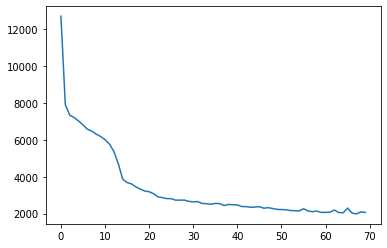

In [24]:
plt.plot(loss_df['loss'])

In [25]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [27]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder
from sklearn.compose import make_column_transformer

In [28]:
ct = make_column_transformer((MinMaxScaler(),['age','bmi','children']),
                             (OneHotEncoder(handle_unknown='ignore'),['sex','smoker','region']))

In [30]:
X = df.drop('charges',axis=1)
y = df['charges']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
ct.fit(X_train)
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

In [39]:
tf.random.set_seed=42

final_model_2 = tf.keras.Sequential()

final_model_2.add(tf.keras.layers.Dense(units=24,activation='relu'))
final_model_2.add(tf.keras.layers.Dense(units=24,activation='relu'))
final_model_2.add(tf.keras.layers.Dense(units=24,activation='relu'))
final_model_2.add(tf.keras.layers.Dense(units=1))

final_model_2.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])

In [40]:
history_2 = final_model_2.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13280.6006 - mae: 13280.6006
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 10285.9902 - mae: 10285.9902
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 7798.9292 - mae: 7798.9292
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 7041.2534 - mae: 7041.2534
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 5874.0107 - mae: 5874.0107
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 4117.7197 - mae: 4117.7197
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 3504.3792 - mae: 3504.3792
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 3423.4915 - mae: 3423.4915
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 3302.1135 - mae: 3302.1135
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 3276.6465 - mae: 3276.

34/34 [==============================] - 0s 2ms/step - loss: 2034.0107 - mae: 2034.0107
Epoch 83/100
34/34 [==============================] - 0s 2ms/step - loss: 2023.6860 - mae: 2023.6860
Epoch 84/100
34/34 [==============================] - 0s 2ms/step - loss: 2013.9486 - mae: 2013.9486
Epoch 85/100
34/34 [==============================] - 0s 2ms/step - loss: 1994.9890 - mae: 1994.9890
Epoch 86/100
34/34 [==============================] - 0s 3ms/step - loss: 2003.3794 - mae: 2003.3794
Epoch 87/100
34/34 [==============================] - 0s 2ms/step - loss: 2011.2091 - mae: 2011.2091
Epoch 88/100
34/34 [==============================] - 0s 2ms/step - loss: 2000.3755 - mae: 2000.3755
Epoch 89/100
34/34 [==============================] - 0s 2ms/step - loss: 2016.6570 - mae: 2016.6570
Epoch 90/100
34/34 [==============================] - 0s 2ms/step - loss: 2009.0544 - mae: 2009.0544
Epoch 91/100
34/34 [==============================] - 0s 2ms/step - loss: 2012.6720 - mae: 2012.6720
Epo

In [41]:
final_model_2.evaluate(X_test,y_test)

9/9 [==============================] - 0s 4ms/step - loss: 1750.9199 - mae: 1750.9199


[1750.919921875, 1750.919921875]

In [42]:
loss_df_2 = pd.DataFrame(data=history_2.history)

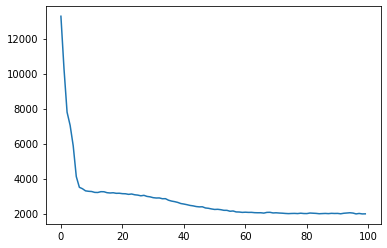

In [43]:
plt.plot(loss_df_2['loss'])